In [1]:
import pandas as pd
import sklearn.preprocessing as sklpre
import sklearn.model_selection as sklms
import sklearn.metrics as sklmet
import matplotlib.pyplot as plt
import numpy as np

import sklearn.neural_network as sklNN

In [57]:
# load data

np.random.seed(3) 


df = pd.read_csv("winequality-white.csv", sep=";")
X = df.drop("quality", axis=1)
y = df["quality"]

# stratified split
X_train, X_test, y_train, y_test = sklms.train_test_split(
    X, y, stratify=y, test_size=0.33
)
yy=y_test

In [20]:
# pre-process data
scaler = sklpre.MinMaxScaler()  # alternative: StandardScaler()
encoder = sklpre.OneHotEncoder(categories="auto", sparse=False)  # onehot-encoder

# Scale design matrix (no categorical)
X_train = pd.DataFrame(
    scaler.fit_transform(X_train.to_numpy()), columns=X_train.columns
)  # to_numpy not needed?

X_test = pd.DataFrame(
    scaler.fit_transform(X_test.to_numpy()), columns=X_test.columns
)  # to_numpy not needed?

y_train =y_train = pd.DataFrame(
    encoder.fit_transform(y_train.to_numpy().reshape(-1, 1)),
    columns=encoder.categories_,
)

y_test = pd.DataFrame(
    encoder.fit_transform(y_test.to_numpy().reshape(-1, 1)), columns=encoder.categories_
)


In [47]:
clf=sklNN.MLPClassifier(hidden_layer_sizes=(12,10), max_iter=600,activation = 'tanh',solver='adam',random_state=1)

In [48]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

/home/student/anaconda3/envs/fysstk/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (600) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [65]:
yy

4224    7
1797    8
2518    7
3527    6
424     7
       ..
4163    5
685     5
4739    6
1973    5
1564    5
Name: quality, Length: 1617, dtype: int64

In [50]:
sklmet.mean_absolute_error(y_test, y_pred)

0.1394116087993639

In [64]:
np.argmax(y_pred.values,axis=1).reshape(-1,1)

array([[0],
       [3],
       [3],
       ...,
       [0],
       [3],
       [2]])

In [66]:
y.value_counts().sort_index().values
y_pred_df=y_train =y_train = pd.DataFrame(np.argmax(y_pred.values,axis=1).reshape(-1,1),columns=yy
)
y_pred_Df

ValueError: Shape of passed values is (1617, 1), indices imply (1617, 1617)

AttributeError: 'DataFrame' object has no attribute 'value_counts'

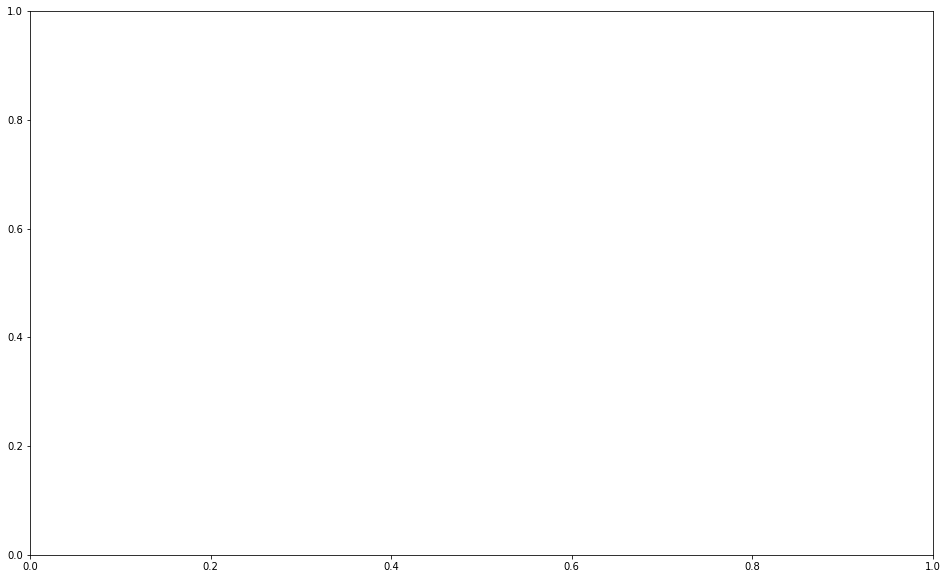

In [53]:

fig, ax = plt.subplots(figsize=(10 * 1.618, 10))
plt.bar([3,4,5,6,7,8,9],y_pred.value_counts().sort_index().values)
plt.xlabel("Quality")
plt.ylabel("Observations")
plt.title("Classes in dataset")
plt.savefig("../Results/hist_y_train.pdf")
plt.show()